# 项目：电影数据库的数据探索

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

通过对电影数据库的数据集文件进行数据的整理形成所需要的数据并进行探索，解决如下问题:
>1.2014年里，制作成本大于1000000的电影，票房收入利润率是否与评分有关系？

>2.哪个导演的电影评分最高？

>3.电影评分与时间是否存在某种趋势？

我们将对提出的问题选择适当的数据，选定分析思路，运用适当的手法并通过可视化展示数据结果以及完成对结论的陈述。

In [1]:
# 载入相关的标准库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 检查常规属性

In [2]:
# 读取并查看数据
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


可以看到一共有10866行数据，21个变量，其中imdb_id，cast，homepage，director，tagline，keywords，overview，genres，production_companies这9列是存在缺失值的，稍后再考虑是否需要舍弃含有缺失值的数据，但是homepage明显对我们接下来的分析没什么用，显然接下来要去掉不必要的列，而release_date的数据类型应为datetime类型，但后面有release_year列，并且数据类型为int，所以也可以去除release_date列只保留年份是变量，而budget和revenue竟然还有0的数字，后面需要考虑筛选条件，在此先进行去除homepage等不需要的数据列，其他的数据根据问题进行筛选。

### 数据清理

#### 删除无关变量

In [6]:
df.drop(['homepage','id','overview','release_date','tagline'],axis = 1,inplace = True)

In [7]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 检查是否存在重复数据，如果存在，则删除重复数据

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace = True)

<a id='eda'></a>
## 探索性数据分析

### Q1:2014年里，制作成本大于1000000的电影，票房收入利润率是否与评分有关系？

操作思路：首先筛选出14年发行且制作成本大于100万的电影，而要计算收入利润率，需要revenue为非0的数据，待筛选完之后将数据进行可视化操作。

根据问题筛选出满足条件的数据，筛选完之后进行检查，然后再创建一个收入利润率的数据列income_ratio，方便我们的使用。

In [10]:
df_q1 = df.query('release_year == "2014"').query('budget > 1000000').query('revenue != 0')
df_q1['income_ratio'] = (df_q1['revenue'] - df_q1['budget']) / df_q1['budget']
df_q1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,income_ratio
count,159.000000,1.590000e+02,1.590000e+02,159.000000,159.000000,159.000000,159.0,1.590000e+02,1.590000e+02,159.000000
mean,2.600057,4.647642e+07,1.510070e+08,109.660377,1063.308176,6.367296,2014.0,4.280901e+07,1.390912e+08,2.573955
std,3.039321,5.423526e+07,2.013082e+08,17.390100,1170.525382,0.850279,0.0,4.995561e+07,1.854232e+08,4.688400
min,0.151591,2.000000e+06,1.507100e+04,79.000000,15.000000,3.800000,2014.0,1.842182e+06,1.388176e+04,-0.997488
25%,0.801781,8.500000e+06,1.392926e+07,97.000000,227.500000,5.800000,2014.0,7.829274e+06,1.283012e+07,-0.046973
50%,1.737699,2.250000e+07,6.734701e+07,106.000000,592.000000,6.300000,2014.0,2.072455e+07,6.203273e+07,1.460601
75%,3.160100,6.000000e+07,2.089952e+08,119.000000,1466.000000,7.000000,2014.0,5.526546e+07,1.925036e+08,3.172393
max,24.949134,2.500000e+08,9.551198e+08,169.000000,6498.000000,8.200000,2014.0,2.302728e+08,8.797523e+08,38.272894


In [11]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 629 to 1179
Data columns (total 17 columns):
imdb_id                 159 non-null object
popularity              159 non-null float64
budget                  159 non-null int64
revenue                 159 non-null int64
original_title          159 non-null object
cast                    159 non-null object
director                159 non-null object
keywords                153 non-null object
runtime                 159 non-null int64
genres                  159 non-null object
production_companies    159 non-null object
vote_count              159 non-null int64
vote_average            159 non-null float64
release_year            159 non-null int64
budget_adj              159 non-null float64
revenue_adj             159 non-null float64
income_ratio            159 non-null float64
dtypes: float64(5), int64(5), object(7)
memory usage: 22.4+ KB


筛选完的数据没有缺失值，而重复值在最初已经去除过，到此数据应该已经达到了我们所需要的程度，那么开始运用可视化展示并陈述结果

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


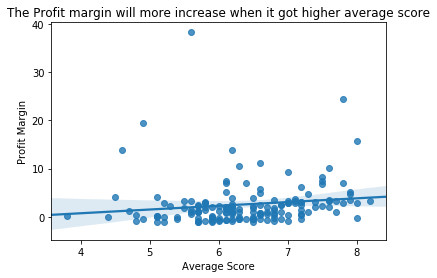

In [12]:
# x_q1 = df_q1['vote_average']
# y_q1 = df_q1['income_ratio']
sns.regplot(x ='vote_average',y ='income_ratio',data = df_q1)
plt.xlabel('Average Score')
plt.ylabel('Profit Margin')
plt.title('The Profit margin will more increase when it got higher average score');

虽然有部分离散点散布在图里，但我们仍然能看到图像呈现出正相关的属性，而且回归线也符合数据间正相关的分布趋势，即大部分电影的收入利润率还是跟平均评分呈现出正相关的。

### Q2:哪个导演的电影评分最高？

操作思路：此问题，需要将电影按照导演进行分组，并取出该导演的电影作品的平均评分进行比较，得出最高分的导演

In [42]:
# 提取director列非缺失值的数据
df_q2 = df[df['director'].notna()]

因为存在着几个导演一起出作品的情况，我们需要把他们分离出来

In [43]:
dir_split = df_q2['director'].str.split('|',expand = True).stack().reset_index(level = 1,drop = True).rename('director')
df_q2 = df_q2.drop('director',axis = 1).join(dir_split)

我们提取含有10部作品数据以上的导演，保证导演的水平不会出现太大的偶然性

In [44]:
dir_list = list(df_q2['director'].value_counts()[df_q2['director'].value_counts()>9].index)
df_q2['check'] = df_q2['director'].isin(dir_list)
df_q2 = df_q2[df_q2['check']]

In [45]:
df_q2_mean = df_q2.groupby('director')['vote_average'].mean()
h_dir = df_q2_mean.idxmax()
h_soc = df_q2_mean.max()
print('The champion is: {} .And his/her movie got a topping average score: {} !'.format(h_dir,h_soc))

The champion is: Christopher Nolan .And his/her movie got a topping average score: 7.469999999999999 !


显然，Christopher Nolan 是冠军，他的电影作品平均分是最高的，达到了7.47分!

### Q3：电影评分与时间是否存在某种趋势？

操作思路：将数据按照10年进行切片分组，接着再用年份区间内电影评分的平均数与年份区间进行比较，观察数据间的关系

In [47]:
df_q3 = df
bin_edge = [1960,1970,1980,1990,2000,2010,2020]
bin_labels = ['1960s','1970s','1980s','1990s','2000s','2010s']
df_q3 ['years'] = pd.cut(df_q3['release_year'],bin_edge,labels = bin_labels)

In [48]:
# 按新变量years检查下所有数据数量的情况
df_q3['years'].value_counts()

2000s    3824
2010s    3116
1990s    1860
1980s    1117
1970s     545
1960s     371
Name: years, dtype: int64

虽然1960-1980年之间的电影数据比后续的任意十年间的少，但是数据数量也能满足我们的需求，继续接下来的操作

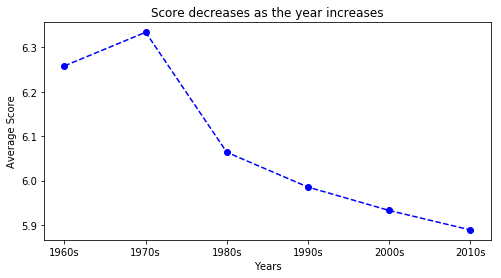

In [49]:
# 求出按years分组后各组评分的平均值，作为可视化的条件之一
df_q3_mean = df_q3.groupby('years')['vote_average'].mean()
df_q3_mean.plot(xticks = [0,1,2,3,4,5],figsize = (8,4),style = 'bo--')
plt.xlabel('Years')
plt.ylabel('Average Score')
plt.title('Score decreases as the year increases');

在以每10年作为递进梯度时可以看到1970s，即1970-1980的电影总体评分是最高的，而往后，电影评分随时间变化而降低，这是否意味着越往后电影作品的总体质量将越来越低，电影行业是否遇到了瓶颈期呢

<a id='conclusions'></a>
## 结论
（注：由于该数据只是提取自其中一个电影数据库的数据，因此所有结论仅适用于该电影数据库范围内的数据。）

1.在2014年里，制作成本大于100万的电影，它的平均评分越高，利润率也会越高，但是制作成本低于100万时是否也符合这个规律，就需要重新进行其他相关数据的分析，而其他年份里是否也符合这个规律，也需要探索其他年份的数据才能得出中体的结论。

2.数据集中Christopher Nolan的电影总体评分最高，达到了7.47分，但是可能存在着大量其他导演的作品未存在数据集中的情况，因此可能存在其他导演具有更高分作品的情况。

3.电影作品的总体质量正随着每十年时间的增加而降低，未来可能质量会继续降低，但降低的幅度却在逐渐减少，因此可能电影界遇到了某种瓶颈，电影总体质量在短时间内不会有大的反弹。但是该数据集只是一个电影数据库中的数据，可能需要多比较其他的电影数据库才能得出最终正确的判断。